In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from ydata_profiling import ProfileReport
from sklearn.preprocessing import PolynomialFeatures

In [88]:
df1=pd.read_csv('Real estate.csv')
df1

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [89]:
df1.drop('No',axis=1,inplace=True)
df1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [91]:
df1.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [92]:
df1.drop('X1 transaction date',axis=1,inplace=True)
df1

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [93]:
df1.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [94]:
df1.rename(columns={'X2 house age':'X2','X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4','X5 latitude':'X5','X6 longitude':'X6',
       'Y house price of unit area':'Y'},inplace=True)
df1

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [95]:
w=['X2', 'X3', 'X4', 'X5', 'X6']
w

['X2', 'X3', 'X4', 'X5', 'X6']

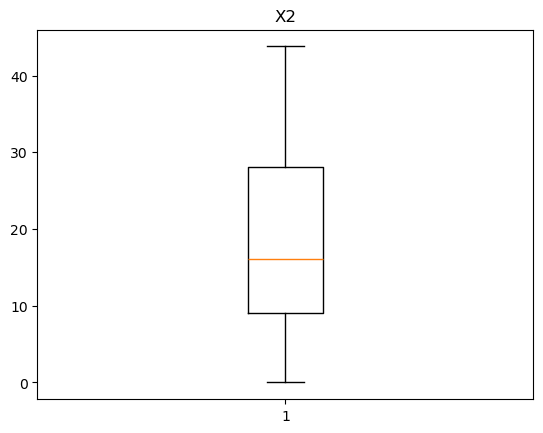

q1 9.025
q2 16.1
q3 28.15
iqr 19.125
upper 56.8375
lower -19.6625


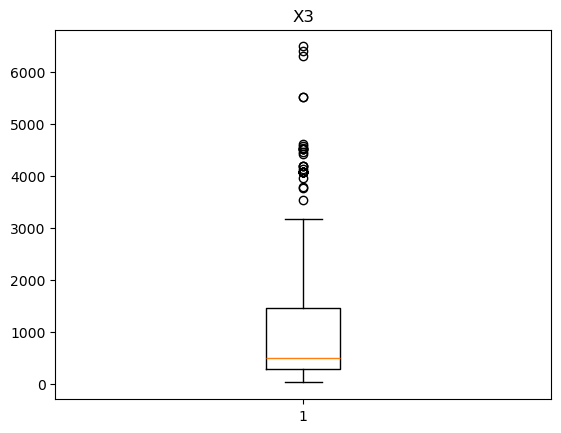

q1 289.3248
q2 492.2313
q3 1454.279
iqr 1164.9542000000001
upper 3201.7103
lower -1458.1065000000003


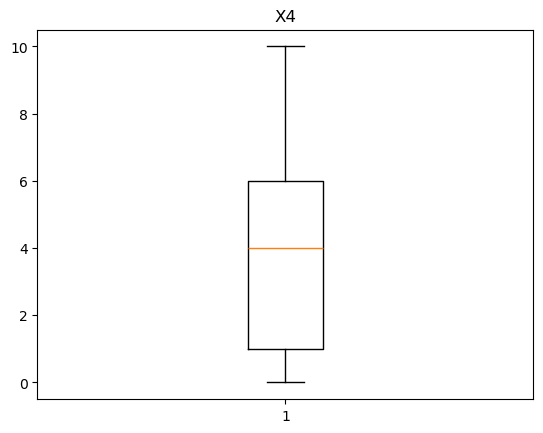

q1 1.0
q2 4.0
q3 6.0
iqr 5.0
upper 13.5
lower -6.5


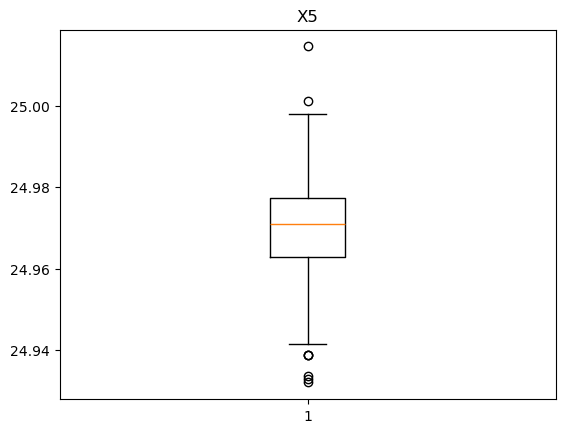

q1 24.963
q2 24.9711
q3 24.977455
iqr 0.014454999999998108
upper 24.999137499999996
lower 24.941317500000004


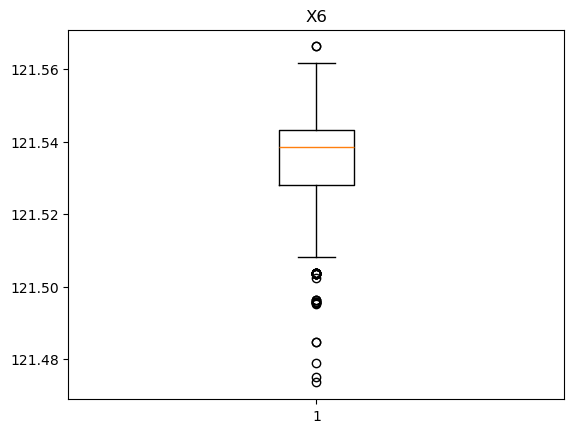

q1 121.528085
q2 121.53863
q3 121.543305
iqr 0.015219999999999345
upper 121.566135
lower 121.505255


In [96]:
for i in w:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()
    
    q1=df1[i].quantile(0.25)
    q2=df1[i].quantile(0.50)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr

    print('q1',q1)
    print('q2',q2)
    print('q3',q3)
    print('iqr',iqr)
    print('upper',upper)
    print('lower',lower)

In [97]:
#remove outliers

In [98]:
df1

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [99]:
df1.describe()

,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


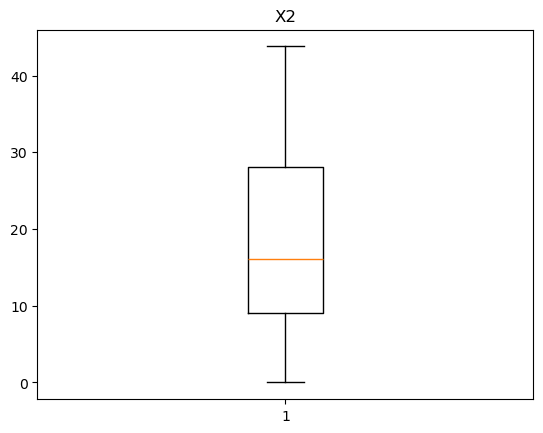

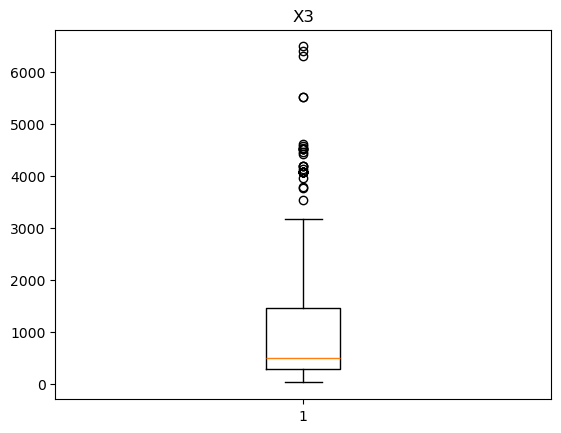

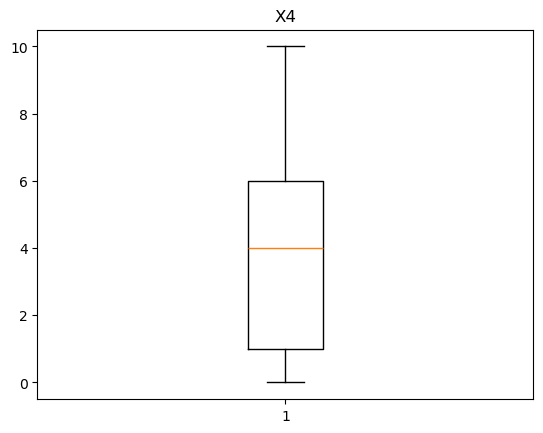

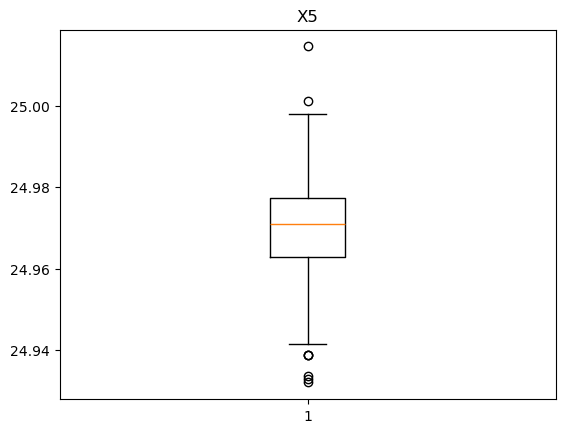

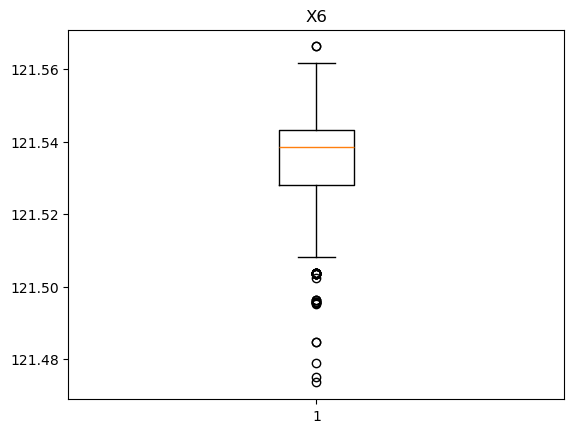

In [100]:
for i in w:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()
    q1=df1[i].quantile(0.25)
    q2=df1[i].quantile(0.50)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr

    df1.loc[df1[i]>upper,i]=upper
    df1.loc[df1[i]<lower,i]=lower

In [101]:
df1

,X2,X3,X4,X5,X6,Y
0,32.0,84.87882,10.0,24.98298,121.540240,37.9
1,19.5,306.59470,9.0,24.98034,121.539510,42.2
2,13.3,561.98450,5.0,24.98746,121.543910,47.3
3,13.3,561.98450,5.0,24.98746,121.543910,54.8
4,5.0,390.56840,5.0,24.97937,121.542450,43.1
...,...,...,...,...,...,...
409,13.7,3201.71030,0.0,24.94155,121.505255,15.4
410,5.6,90.45606,9.0,24.97433,121.543100,50.0
411,18.8,390.96960,7.0,24.97923,121.539860,40.6
412,8.1,104.81010,5.0,24.96674,121.540670,52.5


In [124]:
b=StandardScaler()

In [102]:
w

['X2', 'X3', 'X4', 'X5', 'X6']

In [125]:
for i in w:
    df1[i]=b.fit_transform(df1[[i]])

df1

,X2,X3,X4,X5,X6,Y
0,1.255628,-0.919320,2.007407,1.153160,0.455298,37.9
1,0.157086,-0.690214,1.667503,0.934348,0.402256,42.2
2,-0.387791,-0.426312,0.307885,1.524476,0.721961,47.3
3,-0.387791,-0.426312,0.307885,1.524476,0.721961,54.8
4,-1.117223,-0.603441,0.307885,0.853951,0.615877,43.1
...,...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720,15.4
410,-1.064493,-0.913557,1.667503,0.436220,0.663106,50.0
411,0.095568,-0.603027,0.987694,0.842348,0.427687,40.6
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542,52.5


In [103]:
#df1['X2']=np.sqrt(df1['X2']+1)
#sns.distplot(df1['X2'])
#plt.show()

In [126]:
skew(df1[w])

array([ 0.38153742,  1.21206098,  0.15404583, -0.45064567, -0.81487077])

In [105]:
report=ProfileReport(df1,explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
df1.corr()

,X2,X3,X4,X5,X6,Y
X2,1.000000,-0.003782,0.049593,0.055848,-0.028578,-0.210567
X3,-0.003782,1.000000,-0.643701,-0.589290,-0.745523,-0.704714
X4,0.049593,-0.643701,1.000000,0.452041,0.448234,0.571005
X5,0.055848,-0.589290,0.452041,1.000000,0.395932,0.559845
X6,-0.028578,-0.745523,0.448234,0.395932,1.000000,0.511034
Y,-0.210567,-0.704714,0.571005,0.559845,0.511034,1.000000


In [128]:
x=df1.drop('Y',axis=1)

In [129]:
x

,X2,X3,X4,X5,X6
0,1.255628,-0.919320,2.007407,1.153160,0.455298
1,0.157086,-0.690214,1.667503,0.934348,0.402256
2,-0.387791,-0.426312,0.307885,1.524476,0.721961
3,-0.387791,-0.426312,0.307885,1.524476,0.721961
4,-1.117223,-0.603441,0.307885,0.853951,0.615877
...,...,...,...,...,...
409,-0.352637,2.301396,-1.391638,-2.280691,-2.086720
410,-1.064493,-0.913557,1.667503,0.436220,0.663106
411,0.095568,-0.603027,0.987694,0.842348,0.427687
412,-0.844784,-0.898724,0.307885,-0.192864,0.486542


In [130]:
y=df1['Y']

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=4)

In [174]:
x_train

,X2,X3,X4,X5,X6
319,1.484125,-0.725261,0.307885,-1.114525,0.344854
327,-1.249048,-0.224448,-0.371925,0.523247,1.143390
317,-0.185659,-0.229171,-0.711829,0.736257,0.038955
19,-1.424814,-0.982865,0.987694,-0.111638,0.511973
352,0.060415,1.757090,-0.371925,-0.632973,-1.867649
...,...,...,...,...,...
360,1.334723,-0.916816,2.007407,1.154817,0.453845
385,0.051626,-0.921379,2.007407,1.154817,0.456751
197,1.466548,-0.876075,1.327598,-0.021295,0.502527
174,-1.178741,-0.560589,0.987694,0.947609,0.276554


In [175]:
y_train

319    26.9
327    36.7
317    37.5
19     47.7
352    25.7
       ... 
360    47.1
385    46.6
197    48.2
174    45.2
122    32.5
Name: Y, Length: 207, dtype: float64

In [176]:
model=LinearRegression()

In [177]:
model.fit(x_train,y_train)

LinearRegression()

In [178]:
model.coef_

array([-2.96023568, -7.84692907,  1.36648863,  2.14305577, -0.87756381])

In [179]:
model.intercept_

38.35610962296062

In [180]:
y_pred=model.predict(x_test)
y_pred

array([49.92608408, 28.25252709, 28.11074912, 34.30133597, 33.87121293,
       39.85208517, 41.21613931, 47.56757295, 42.80827011, 32.97270921,
       28.10035227, 35.70260011, 42.08534271, 41.7438926 , 16.39376424,
       48.75868444, 42.94934097, 15.80275814, 16.69136834, 32.56686569,
       41.11441661, 51.12531291, 36.14011921, 50.18659989, 45.83387124,
       47.5098642 , 51.22937511, 43.02738761, 35.87058845, 41.93314604,
       49.23666557, 38.13436079, 48.85828594, 42.04888327, 44.19462825,
       50.68035183, 35.11453756, 25.5188807 , 35.13806104, 37.10439302,
       51.28140621, 43.51105313, 36.78620975, 45.93060834, 42.81593409,
       51.07328182, 26.82823311, 25.5709118 , 38.68821918, 47.48787449,
       32.09700498, 50.18659989, 32.40080732, 27.44575968, 40.21159457,
       42.1937849 , 45.72527063, 38.61734004, 41.92924942, 46.42281914,
       48.88430149, 42.88697553, 27.46363339, 41.69664921, 28.53467846,
       44.93493203, 47.75104703, 50.18659989, 26.52917074, 48.69

In [181]:
y_test

339    50.4
408    28.1
55     13.7
64     25.3
248    22.3
       ... 
185    21.5
219    40.2
132    37.5
348    53.7
177    42.0
Name: Y, Length: 207, dtype: float64

In [182]:
residual=y_test-y_pred

<Axes: xlabel='Y', ylabel='Density'>

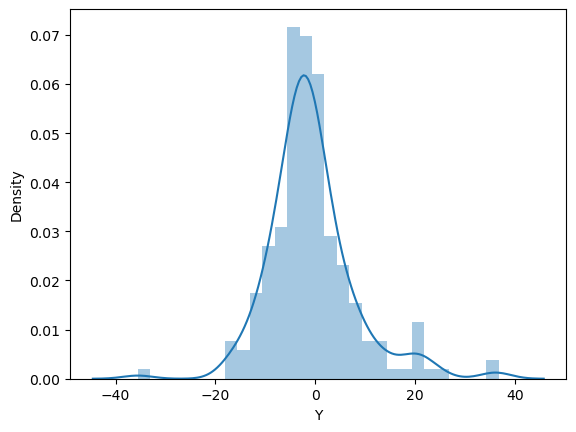

In [183]:
sns.distplot(residual)

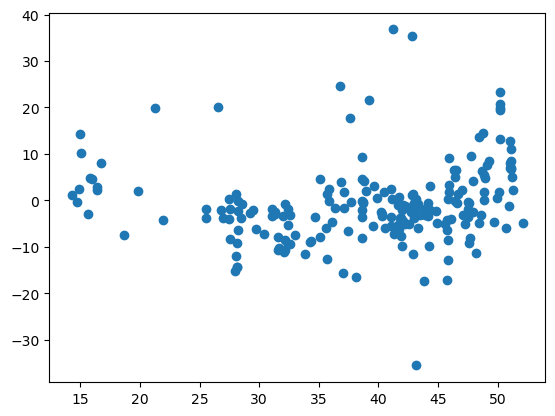

In [184]:
plt.scatter(y_pred,residual)
plt.show()

In [185]:
#training data
y_pred_train=model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
mae=mean_absolute_error(y_train,y_pred_train)
train=r2_score(y_train,y_pred_train)
print('mse',mse)
print('mae',mae)
print('train',train)

mse 74.27682354271155
mae 5.523484606189455
train 0.6020604698168317


In [186]:
#testing data
y_pred_test=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
test=r2_score(y_test,y_pred_test)
print('mse',mse)
print('mae',mae)
print('test',test)

mse 76.78569215847075
mae 6.162641190018067
test 0.5797113842128554
